# Lista de Exercício 8
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste de 2 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_8.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

### Introdução:

Vamos importar as bibliotecas que utilizaremos durante essa prática!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.io import loadmat
import cmath

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [2]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/circuit.tif", "circuit.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/lena.tif", "lena.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/H1.mat", "H1.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/H2.mat", "H2.mat")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Restauração de imagem com borramento (Nota:5,0)

Em algumas situações, as imagens digitais são corrompidas por outros tipos de degradações, diferentes daqueles vistos na prática anterior, como o ruído Gaussiano e Poisson. Essas degradações, muitas vezes, são transferidas para as imagens no momento de aquisição, gerando um borramento ou sensação de movimento na imagem digitalizada.

Nessa prática, iremos trabalhar algumas técnicas de restauração para melhorar a qualidade da imagem para estas situações.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/exercicio1.png" width="750" height="430"></center>

<center><caption><b> Figura 1:</b> Modelo de degradação utilizado na construção de "circuit_blur.tif".</b></caption></center>
<caption><center> </center></caption>

A situação acima mostra uma imagem sendo degradada no domínio da frequência por uma função de transferência $H(u,v)$ modelada a partir da seguinte equação, sendo $𝑘=5.10^{−4}$:

$$ 𝐻_{1}(𝑢,𝑣)=exp(−𝑘(𝑢^{2}+𝑣^{2})^{5/6}) $$

Diante disso, faça o que se pede:

1. Carregue a imagem "circuito.tif"
2. Agora, carregue a matriz de degradação "H1" que será aplicada na imagem. Para isso, utilizaremos a função "loadmat" disponibilizada na biblioteca "scipy.io". Utilize as linhas de código abaixo para realizar esse procedimento:
```python
DegradBlur = loadmat('H1.mat')
H1 = DegradBlur['H']
```

3. Utilize a função ```InsertDegBlur``` fornecida logo abaixo para aplicar  a degradação de borramento (Blur) na imagem, utilizando a matriz de degração $H_{1}$ carregada no item anterior. A função já está pronta, apenas comente as linhas de código da função ```InsertDegBlur``` para mostrar que você entendeu o que ela faz.
4. Mostre a imagem degradada e original lado a lado.
5. Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
```python
img_pad = np.pad(img, (225, 225), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)
```
6. Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
7. Visualize a imagem restaurada no item 1.6. e sua versão original. Comente os resultados.
8. Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 300, 200 e 100 pixels. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.
9. Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados.


Text(0.5, 1.0, 'Imagem Restaurada raio 100')

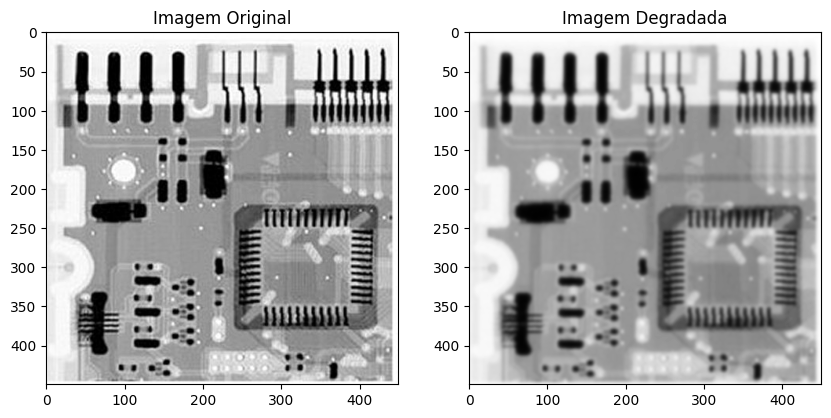

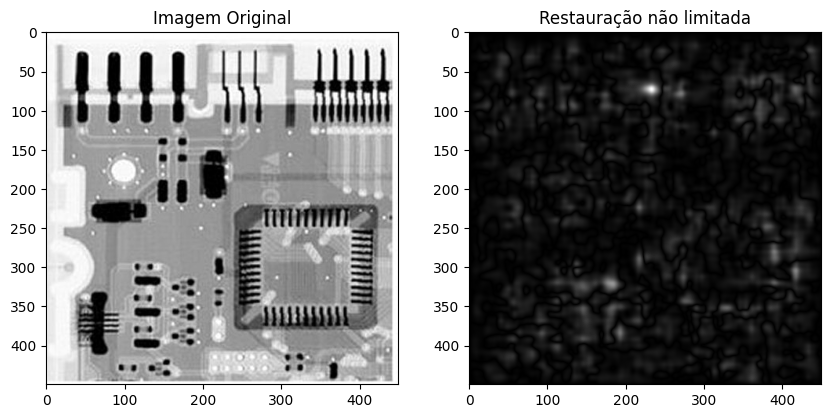

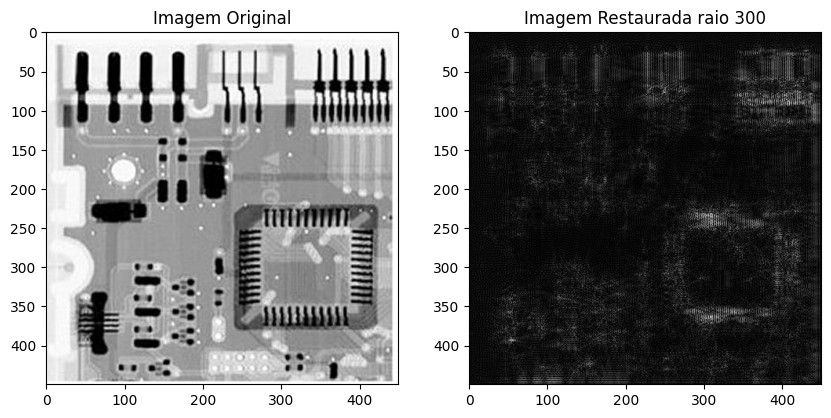

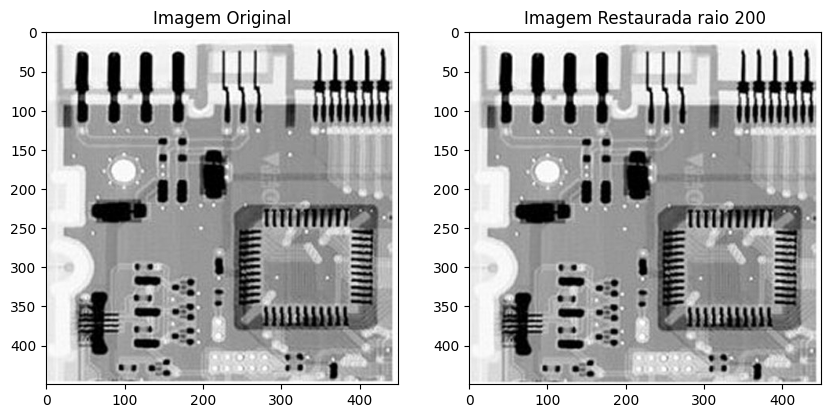

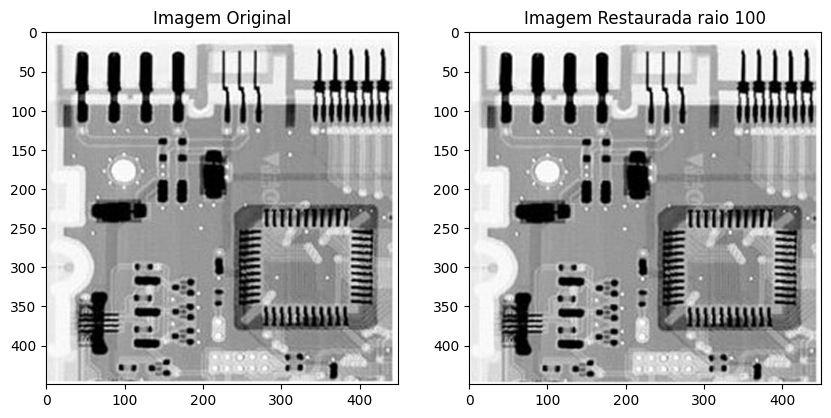

In [5]:
def InsertDegBlur(img,H):
  '''
  Entrada:
    - img: Imagem de entrada.

  Saída:
    - imgNoisy: Imagem degradada.
  '''
  imgPadd = np.pad(img, (225, 225), 'symmetric') # Faz o padding da imagem recebida
  imgF = np.fft.fft2(imgPadd) # realiza a DFT da imagem com padding
  fshift = np.fft.fftshift(imgF) # realiza o shift
  ImgDregF = fshift*H # multiplica a DFT da imagem com o ruído
  f_inverse = np.fft.ifftshift(ImgDregF) # realiza o shift
  imgDreg = np.fft.ifft2(f_inverse) # retorna a imagem ao domínio do espaço
  imgDreg = np.abs(imgDreg[224:674,224:674]) # retira os possíveis restos de numeros complexos e o padding
  imgDreg = imgDreg.astype('uint8') # transforma a imagem borrada em uint8

  return imgDreg

## -- Seu código começa AQUI -- ##
# Carregando a imagem
img1 = cv.imread('circuit.tif', cv.IMREAD_UNCHANGED)

# Carregando a matriz de degradação
DegradBlur = loadmat('H1.mat')
H1 = DegradBlur['H']

# Aplicando a degradação na imagem
img1_blur = InsertDegBlur(img1, H1)

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_blur, cmap='gray')
ax1.set_title('Imagem Degradada')

# Realizando a TF na imagem degradada
img1_pad = np.pad(img1, (225, 225), 'symmetric')
f1_blur = np.fft.fftshift(np.fft.fft2(img1_pad))

# Aplicando o filtro inverso não limitado
f1 = f1_blur*(1/H1)

# Realizando a transformada inversa
img1_restore = np.fft.ifft2(np.fft.fftshift(f1))
img1_restore = np.abs(img1_restore[224:674,224:674])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_restore, cmap='gray')
ax1.set_title('Restauração não limitada')

# Aplicando o filtro inverso limitado ao raio 300
m, n = H1.shape
cx = m/2
cy = n/2

H1_300 = H1

for i in range(m):
  for j in range(n):
    dist = np.sqrt((i-cx)**2 + (j-cy)**2)
    if dist > 300:
      H1_300[i,j] = 1

f1_300 = f1_blur*(1/H1_300)

# Realizando a transformada inversa
img1_restore_300 = np.fft.ifft2(np.fft.fftshift(f1_300))
img1_restore_300 = np.abs(img1_restore_300[224:674,224:674])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_restore_300, cmap='gray')
ax1.set_title('Imagem Restaurada raio 300')

# Aplicando o filtro inverso limitado ao raio 200
H1_200 = H1

for i in range(m):
  for j in range(n):
    dist = np.sqrt(i**2 + j**2)
    if dist > 200:
      H1_200[i,j] = 1

f1_200 = f1_blur*(1/H1_200)

# Realizando a transformada inversa
img1_restore_200 = np.fft.ifft2(np.fft.fftshift(f1_200))
img1_restore_200 = np.abs(img1_restore_200[224:674,224:674])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_restore_200, cmap='gray')
ax1.set_title('Imagem Restaurada raio 200')

# Aplicando o filtro inverso limitado ao raio 200
H1_100 = H1

for i in range(m):
  for j in range(n):
    dist = np.sqrt(i**2 + j**2)
    if dist > 100:
      H1_100[i,j] = 1

f1_100 = f1_blur*(1/H1_100)

# Realizando a transformada inversa
img1_restore_100 = np.fft.ifft2(np.fft.fftshift(f1_100))
img1_restore_100 = np.abs(img1_restore_100[224:674,224:674])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img1, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img1_restore_100, cmap='gray')
ax1.set_title('Imagem Restaurada raio 100')

## -- Seu código termina AQUI -- ##

## Comentários:
# Percebe-se que o filtro inverso é pouco efetivo, caso não haja limitação no seu raio, pois ele
# apesar de diminuir a degradação, amplifica o ruído tornando a imagem apenas ruído.

### 2) Restauração de imagem com borramento e movimento (Nota:5,0)

<center><img src="
https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_08/exercicio2.png" width="750" height="430"></center>

<center><caption><b> Figura 2:</b> Modelo de degradação utilizado para a construção de "lena_deg.tif".</b></caption></center>
<caption><center> </center></caption>

A imagem foi degradada por uma função de espalhamento de ponto e movimento construídos a partir das seguintes equações:

$$ H_{2}(u,v)=H_{blur}(u,v).H_{motion}(u,v) $$

$$ H_{blur}(u,v)=exp(-k(u^{2}+v^{2})^{5/6}) $$

$$ H_{motion}(u,v) = \gamma \cdot sinc(\alpha u + \beta v) \cdot exp(-j \pi(\alpha u + \beta v) ) $$

Sendo $k=5.10^{−5}$, $\alpha=−6.10^{−3}$, $\beta=4.10^{−3}$ e $\gamma=1$. A imagem foi também corrompida por ruído aditivo gaussiano com variância igual a $\sigma^{2}≅6,5$. Diante disso, siga os passos abaixo:

1. Carregue a imagem "lena.tif"
2. Agora, carregue a matriz de degradação "H2" que será aplicada na imagem.
3. Utilize a função ```InsertDegMotion``` fornecida logo abaixo para aplicar  a degradação de borramento (Blur) e movimento na imagem, utilizando a matriz de degração "$H_{2}$" carregada no item anterior. A função já está pronta, apenas comente as linhas de código da função ```InsertDegMotion``` para mostrar que você entendeu o que ela faz.
4. Mostre a imagem degradada e original lado a lado.
5. Aplique a transformada de Fourier na imagem degradada. Nesse momento, é importante a utilização do PADDING antes da transformada de Fourier. Para fins de padronização, utilize o padding simétrico de acordo com o código abaixo:
```python
img_pad = np.pad(img, (256, 256), 'symmetric')
imgPaddingF = np.fft.fft2(img_pad)
fshift = np.fft.fftshift(imgPaddingF)
```
6. Restaure a imagem degradada no domínio da frequência utilizando filtro inverso não limitado.
7. Visualize a imagem restaurada no item 2.6. e sua versão original. Comentar os resultados.
8. Restaure a imagem degradada utilizando filtro inverso limitado com frequências de corte iguais a 200, 100 e 50. Pode-se limitar o filtro inverso implementando 𝐻(𝑢,𝑣)=1 para todas as frequências maiores que a determinada frequência de corte.
9. Visualizar as imagens restauradas e sua versão não degradada. Comentar os resultados;
10. Restaure a imagem degradada utilizando filtro de Wiener com parâmetro $𝐾=3.10^{-3}$. Abaixo, segue a fórmula do filtro:

$$ Img_{Wiener}(u,v) = I(u,v).H_{Wiener}(u,v)$$

$$ H_{Wiener}(u,v) =  \frac{1}{|H(u,v)|}. \frac{|H(u,v)|^{2}}{(|H(u,v)|^{2} + K)}       $$

em que $H(u,v)$ é a função degradação.
11. Comente sobre a diferenças de resultado no processo de filtragem do item 2.8 e 2.10.




Text(0.5, 1.0, 'Imagem Restaurada com filtro de Wiener')

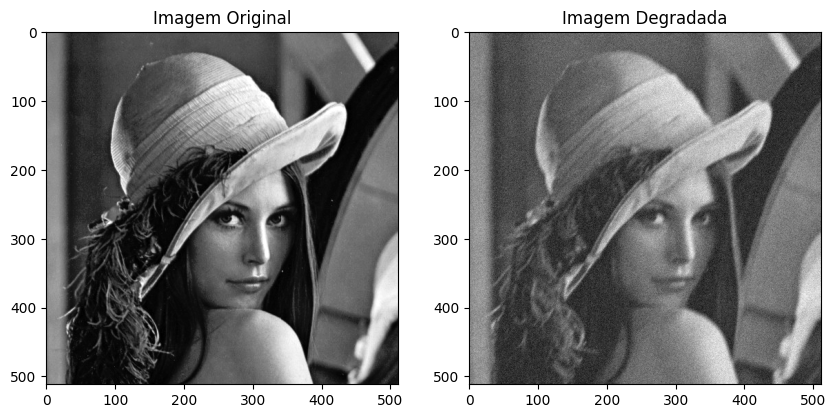

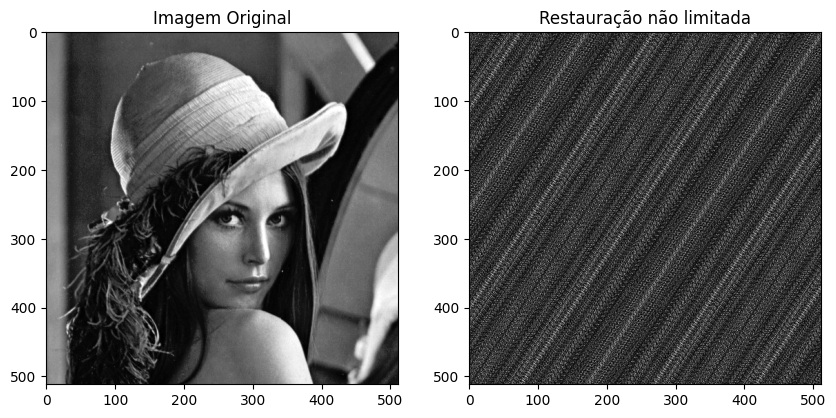

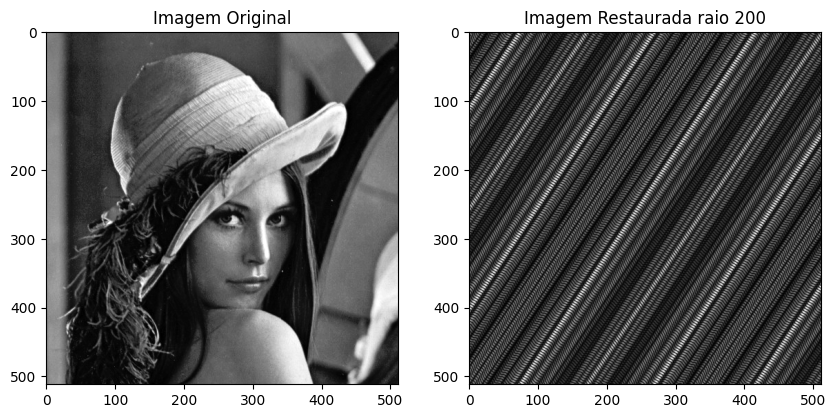

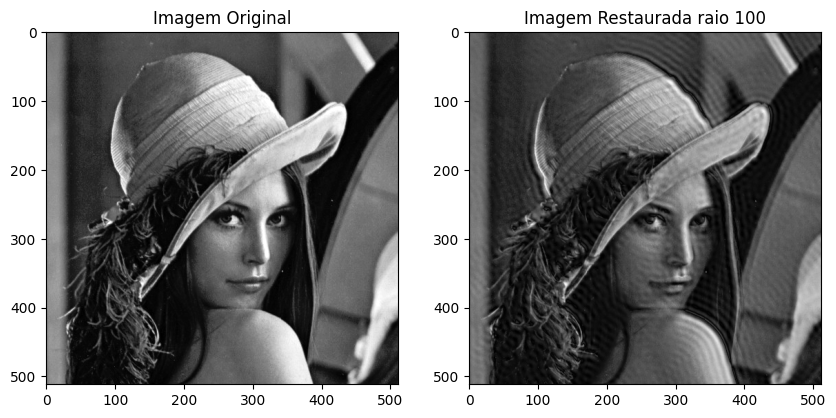

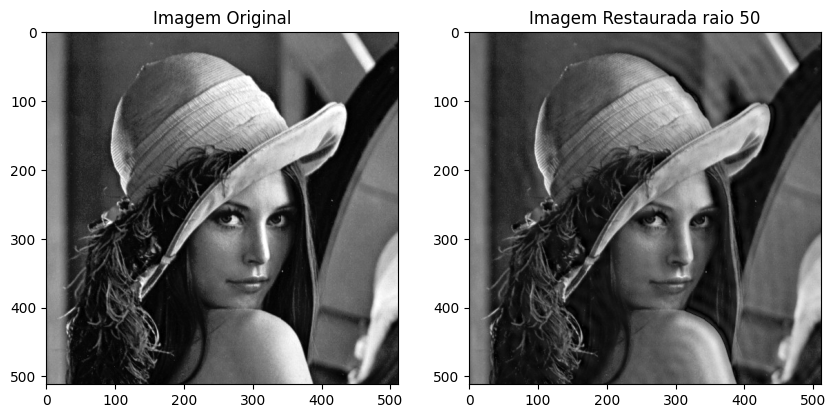

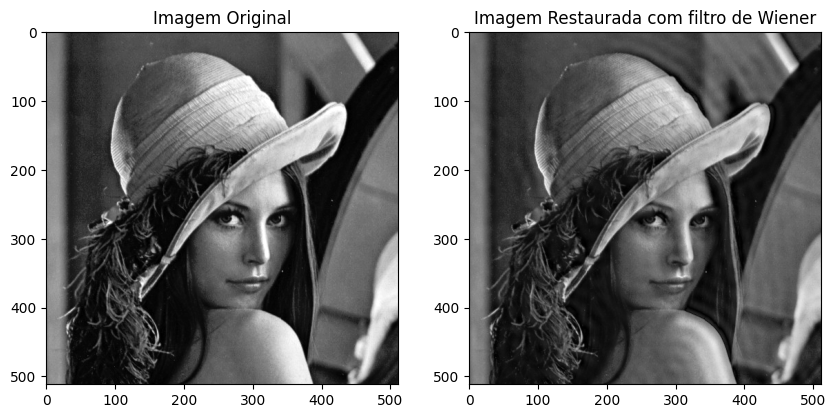

In [12]:
def InsertDegMotion(img,H):
  '''
  Entrada:
    - img: Imagem de entrada.

  Saída:
    - imgNoisy: Imagem degradada.
  '''
  nRowsOri, nColsOri = img.shape # pega o shape da imagem
  imgPadd = np.pad(img, (256, 256), 'symmetric') # realiza o padding na imagem
  imgF = np.fft.fft2(imgPadd) # calcula a TF
  fshift = np.fft.fftshift(imgF) # faz o shift
  ImgDregF = fshift*H # aplica a degradação
  f_inverse = np.fft.ifftshift(ImgDregF) # faz o shift
  imgDreg = np.fft.ifft2(f_inverse) # realiza a transformada inversa
  imgDreg = np.abs(imgDreg[255:767,255:767]) # retira os possíveis restos de numeros complexos e o padding
  imgDreg = imgDreg.astype('uint8') # converte a imagem para uint8
  noise =  15*np.random.normal(size=(nRowsOri,nColsOri)).astype(float) # cria o ruído Gaussiano
  imgDreg = imgDreg + noise # aplica o ruído Gaussiano
  return imgDreg

## -- Seu código começa AQUI -- ##
# Carregando a imagem
img2 = cv.imread('lena.tif', cv.IMREAD_UNCHANGED)

# Carregando a matriz de degradação
DegradBlur = loadmat('H2.mat')
H2 = DegradBlur['H']

# Aplicando a degradação na imagem
img2_blur = InsertDegMotion(img2, H2)

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_blur, cmap='gray')
ax1.set_title('Imagem Degradada')

# Realizando a TF na imagem degradada
img2_pad = np.pad(img2, (256, 256), 'symmetric')
f2_blur = np.fft.fftshift(np.fft.fft2(img2_pad))

# Restaurando a imagem com o filtro não limitado
f2 = f2_blur*(1/H2)

# Realizando a transformada inversa
img2_restore = np.fft.ifft2(np.fft.fftshift(f2))
img2_restore = np.abs(img2_restore[255:767,255:767])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_restore, cmap='gray')
ax1.set_title('Restauração não limitada')

# Aplicando o filtro inverso limitado ao raio 200
m, n = H2.shape
cx = m/2
cy = n/2

H2_200 = H2

for i in range(m):
  for j in range(n):
    dist = np.sqrt((i-cx)**2 + (j-cy)**2)
    if dist > 200:
      H2_200[i,j] = 1

f2_200 = f2_blur*(1/H2_200)

# Realizando a transformada inversa
img2_restore_200 = np.fft.ifft2(np.fft.fftshift(f2_200))
img2_restore_200 = np.abs(img2_restore_200[255:767,255:767])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_restore_200, cmap='gray')
ax1.set_title('Imagem Restaurada raio 200')

# Aplicando o filtro inverso limitado ao raio 100
H2_100 = H2

for i in range(m):
  for j in range(n):
    dist = np.sqrt((i-cx)**2 + (j-cy)**2)
    if dist > 100:
      H2_100[i,j] = 1

f2_100 = f2_blur*(1/H2_100)

# Realizando a transformada inversa
img2_restore_100 = np.fft.ifft2(np.fft.fftshift(f2_100))
img2_restore_100 = np.abs(img2_restore_100[255:767,255:767])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_restore_100, cmap='gray')
ax1.set_title('Imagem Restaurada raio 100')

# Aplicando o filtro inverso limitado ao raio 100
H2_50 = H2

for i in range(m):
  for j in range(n):
    dist = np.sqrt((i-cx)**2 + (j-cy)**2)
    if dist > 50:
      H2_50[i,j] = 1

f2_50 = f2_blur*(1/H2_50)

# Realizando a transformada inversa
img2_restore_50 = np.fft.ifft2(np.fft.fftshift(f2_50))
img2_restore_50 = np.abs(img2_restore_50[255:767,255:767])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_restore_50, cmap='gray')
ax1.set_title('Imagem Restaurada raio 50')

# Restaurando a imagem com filtro de Wiener
K = 0.003
H_wiener = (1/H2)*(np.abs(H2)**2/(np.abs(H2)**2 + K))

f2_wiener = f2_blur*H_wiener

# Realizando a transformada inversa
img2_restore_wiener = np.fft.ifft2(np.fft.fftshift(f2_wiener))
img2_restore_wiener = np.abs(img2_restore_wiener[255:767,255:767])

# Mostrando as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,14))

ax0.imshow(img2, cmap='gray')
ax0.set_title('Imagem Original')
ax1.imshow(img2_restore_wiener, cmap='gray')
ax1.set_title('Imagem Restaurada com filtro de Wiener')
## -- Seu código termina AQUI -- ##

## Comentários:
# Quanto mais limitado o raio do filtro de restauração, melhor se torna a imagem. O filtro de Wiener "simula" 
# um filtro de raio adaptativo, de modo que o resultado a degradação por esse filtro é muito similar ao filtro 
# de raio menor.